# Desafio Extra - Visualização de Produtos de E-Commerce

___

# Imports

In [1]:
import numpy as np
import os
import pandas as pd

In [2]:
""" habilitando plots no notebook """
%matplotlib inline

In [3]:
""" plot libs """
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
""" Configurando o Matplotlib para o modo manual """
plt.interactive(False)

# Objetivo:

Visualizar dados de um problema de classificação de produtos de e-commerce projetados em 2D.

Esses são dado reais de uma pesquisa que fiz durante meu tempo trabalhando com e-commerce. Cada coordenada é um **word embedding** de duas dimensões que é a representação matemática vetorial da string de **nome de produto** de um dos produtos processados. Cada **label** representa a categoria do produto, marcada manualmente por funcionários da empresa.

A metodologia da extração de uma representação vetorial de strings não entra no escopo dessa aula, os valores já estão dados no arquivo `data/produtos_ecommerce.csv`. Para saber mais sobre o assunto, os links a seguir são uma boa fonte inicial de informações.

- [Word Embedding](https://en.wikipedia.org/wiki/Word_embedding)
- [word2vec](https://en.wikipedia.org/wiki/Word2vec)
- [T-SNE](https://distill.pub/2016/misread-tsne/)


# Dataset:

In [5]:
""" Tamanho do Dataset """
df = pd.read_csv(
    os.path.join("data", "produtos_ecommerce.csv"),
    sep="\t",
    encoding="utf-8"    
)
df[["coord_x", "coord_y"]] = df[["coord_x", "coord_y"]].astype(float)
df.head()

,product,coord_x,coord_y,label
0,Samsung C3300 Beat Mix GSM c/ conte,39.068605,-16.782294,Celular
1,"Nextel Motorola I1 R$ 899,99 Novo 6 meses de g...",57.606494,-37.437367,Celular
2,Celular Samsung Tri Chip E1263 Grafite com Dis...,43.138042,-8.107118,Celular
3,Samsung Galaxy Note N7000 Desbloqueado,32.882656,-39.384115,Celular
4,Celular Desbloqueado LG C310 NeoSmart Dual Chi...,31.885572,-5.965907,Celular


In [6]:
""" Tamanho da tabela """
df.shape

(4822, 4)

In [7]:
""" Contagem de Produtos por Categoria"""
df.label.value_counts()

Notebook          600
Celular           600
Tablet            600
Impressora        600
Mouse             600
Fone de Ouvido    591
Pendrive          300
Teclado           245
Filmadora         231
DVD Player        231
Computador        224
Name: label, dtype: int64

# Instruções

Para cada item abaixo, siga as instruções e obtenha uma figura similar à do gabarito.

## A) Visualizar Todo o Dataset

Plotar todos os produtos usando as coordenadas **coord_x** e **coord_y**. 

Cada **categoria** deve ser representada por uma **cor diferente**.

A figura deve ter uma **legenda** mostrando as categorias e suas cores.

### Gabarito

![](images/tsne_a.png)

### Solução

In [8]:
cores = ["red", "green", "blue", 
         "cyan", "magenta", "yellow", 
         "purple", "orange", "black", 
         "pink", "silver"]

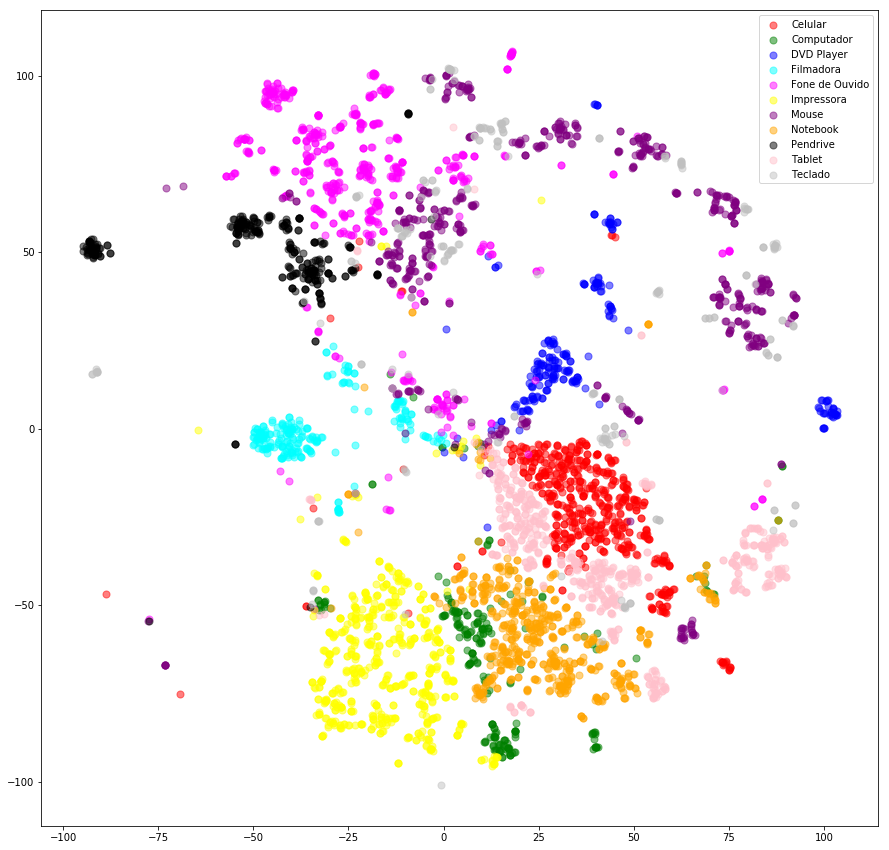

In [9]:

plt.figure(figsize=(15, 15))

for n, k in enumerate(df.label.unique()):
    tmp = df.loc[df.label == k]
    plt.scatter(x=tmp.coord_x, 
                y=tmp.coord_y, 
                s=50, 
                c=cores[n], 
                alpha=0.5,
                label=k)
plt.legend()
plt.show()

## B) Visualizar uma amostra com o texto

Plotar **duas categorias**, apenas 10 produtos de cada, usando o campo **product** para plotar também o texto.

A figura deve manter a **legenda** mostrando apenas as duas categorias e suas cores.

### Gabarito

![](images/tsne_b.png)

### Solução

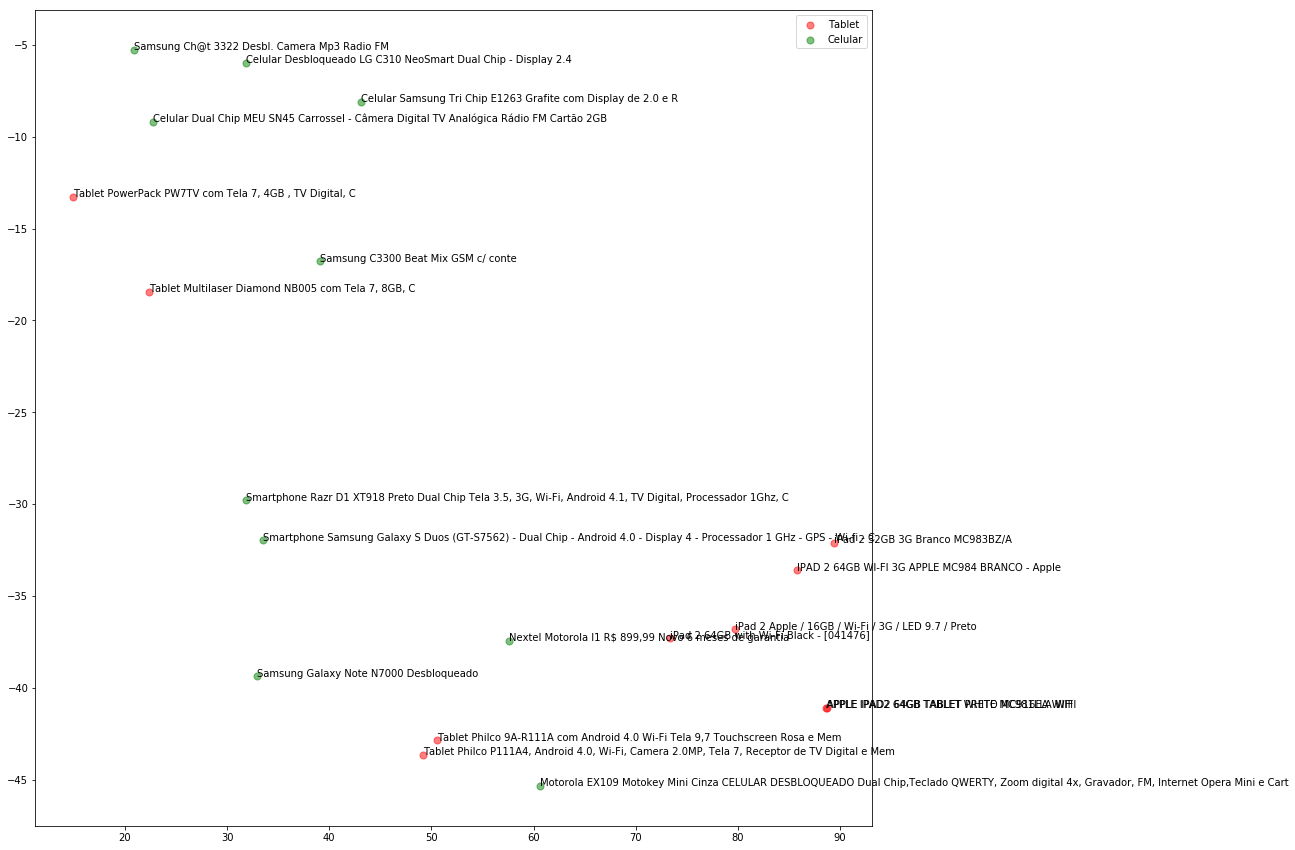

In [10]:
plt.figure(figsize=(15, 15))

for n, k in enumerate(["Tablet", "Celular"]):
    tmp = df.loc[df.label == k].iloc[:10, :]
    plt.scatter(x=tmp.coord_x, 
                y=tmp.coord_y, 
                s=50, 
                c=cores[n], 
                alpha=0.5,
                label=k)
    for p, x, y, _ in tmp.values:
        plt.text(x=x, y=y, s=p)
plt.legend()
plt.show()